# Importing libraries

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Loading the dataset

In [2]:
iris_data = datasets.load_iris()

# dataset information

**No. of datapoints:** 150

**No. of features:** 4 (sepal length, sepal width, petal length, petal width)
                    
                    Note: we're going to use only 2 features (petal length and petal width)
                    
**No. of classes:** 3 (sentosa, versicolor, virginica)

In [3]:
X = iris_data.data[:, [2, 3]]
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Visualizing the dataset

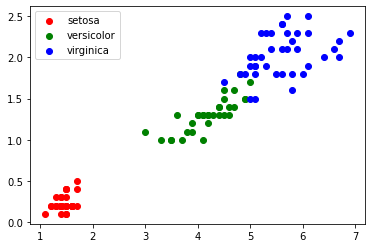

In [4]:
colors = {0: 'red', 1:'green', 2:'blue'}
for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(X_train[np.where(y_train==idx)][:,0], X_train[np.where(y_train==idx)][:,1],
           c=colors[idx], label=iris_data['target_names'][idx])
plt.legend()
plt.show()

# Train SVM classifier

In [5]:
SVM = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
SVM.fit(X_train, y_train)

print('Accuracy of SVM model on the training data', SVM.score(X_train, y_train)*100, "%")

Accuracy of SVM model on the training data 97.14285714285714 %


# Evaluate SVM classifier

In [6]:
print('Accuracy of SVM model on the training data', SVM.score(X_test, y_test)*100, "%")

Accuracy of SVM model on the training data 97.77777777777777 %


# Visualize decision boundry

In [7]:
import warnings
from matplotlib.colors import ListedColormap
colors = ('red', 'green', 'blue')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
def versiontuple(version):
    return tuple(map(int, (version.split("."))))
def decision_plot(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1min, x1max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2min, x2max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution),
                 np.arange(x2min, x2max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
              alpha=0.8, c=cmap(idx),
              marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


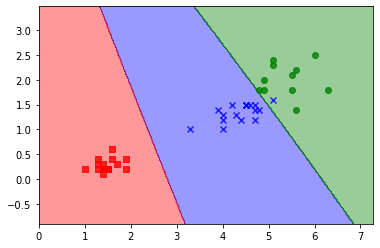

In [8]:
decision_plot(X_test, y_test, SVM)

# SVM interactive demo

https://cs.stanford.edu/~karpathy/svmjs/demo/